<a href="https://colab.research.google.com/github/ufairahbashir/machine-learning/blob/main/Final_ML_H071201091_ufairah2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Diri

Nama: Ufairah Damara Bashir
<br>
NIM: H071201091

# Decision Tree

### 1. import library

In [86]:
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. import data melalui akun kaggle

untuk data yang mempunyai penyimpanan data besar (berhubung data yang akan saya kelola berkisar 72 MB):

- ke akun kaggle
- ke profil dan ke bagian UPI
- kalau mau membuat token baru dengan cara klik create new UPI token dan otomatis terunduh file text yg isinya username dengan key-nya. lalu import os dan masukkan username dan key-nya

In [87]:
os.environ['KAGGLE_USERNAME'] = "ufairahbashir"
os.environ['KAGGLE_KEY'] = "4bb11797aa62c6027e309f1b5c852efd"

selanjutnya adalah copy link dataset yang akan diambil **tapi hanya sampai tepat setelah kata kaggle.com. atau bisa juga copy link akun/judul_data** karena beberapa dataset link nya berupa kaggle.com/dataset/akun/judul_data nah yg dicopy dari akun/judul_data nanti otomatis tersimpan di konten (konten adalah tempat file di bagian kiri) dalam bentuk arsip lalu nanti diekstra arsipnya. misalkan:

In [88]:
!kaggle datasets download -d ruslankl/mice-protein-expression

mice-protein-expression.zip: Skipping, found more recently modified local copy (use --force to force download)


nanti file yang telah terunduh dapat tampil pada bagian 'file' di sebelah kiri. lalu copy path-nya dan salin di sini untuk diesktrak

In [89]:
!unzip -q /content/mice-protein-expression.zip

replace Data_Cortex_Nuclear.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


### 3. read data

In [90]:
df = pd.read_csv("/content/mice-protein-expression.zip")
print(df)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H

intinya terdapat 1080 pengukuran pada setiap protein pada tikus

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:

1. c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)

2. c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)

3. c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)

4. c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

5. t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

6. t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)

7. t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)

8. t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

### 4. data.head

In [91]:
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

### 5. ubah df ke df2

In [92]:
df2 = df
df2.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [93]:
#drop col berikut karena bersifat objek
df2 = df.drop(['Treatment','MouseID','Behavior', 'Genotype'],axis=1)

df2 = df2.fillna(df.mean())
df2.head(20)

<ipython-input-93-dcda8e11815c>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df2 = df2.fillna(df.mean())


DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0   0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1   0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2   0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3   0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4   0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
5   0.447506  0.628176  0.367388  2.385939  4.807635  0.218578  0.176233   
6   0.428033  0.573696  0.342709  2.334224  4.473130  0.225173  0.184004   
7   0.416923  0.564036  0.327703  2.260135  4.268735  0.214834  0.179668   
8   0.386311  0.538428  0.317720  2.125725  4.063950  0.207222  0.167778   
9   0.380827  0.499294  0.362462  2.096266  3.598587  0.227649  0.188093   
10  0.366511  0.513278  0.327792  2.072572  3.661058  0.229475  0.193797   
11  0.364154  0.499411  0.355124  2.006871  3.466627  0.216333  0.204358   
12  0.364873  0.482102  0.312539  1.946201  3.349592  0.230898  0.188821   
13  0.381911  0.485914  0.310951  1.958907  3.349290  0.225800  0.188519   
14  0.374410  0.462313  0.344629  1.861162  3.287123  0.221811  0.185459   
15  0.743118  0.862653  0.377742  2.735757  6.067570  0.219049  0.185338   
16  0.711480  0.807054  0.351591  2.546888  5.595574  0.199170  0.165975   
17  0.704633  0.802537  0.350110  2.467733  5.548400  0.205323  0.165058   
18  0.677359  0.770235  0.356397  2.563223  4.975196  0.228087  0.186498   
19  0.591572  0.678768  0.312480  2.164182  4.313938  0.195786  0.161102   

    pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N    BCL2_N     pS6_N  \
0    2.373744  0.232224  1.750936  ...  0.122652  0.134762  0.106305   
1    2.292150  0.226972  1.596377  ...  0.116682  0.134762  0.106592   
2    2.283337  0.230247  1.561316  ...  0.118508  0.134762  0.108303   
3    2.152301  0.207004  1.595086  ...  0.132781  0.134762  0.103184   
4    2.134014  0.192158  1.504230  ...  0.129954  0.134762  0.104784   
5    2.141282  0.195188  1.442398  ...  0.131575  0.134762  0.106476   
6    2.012414  0.195789  1.612036  ...  0.141806  0.134762  0.097834   
7    2.007985  0.189803  1.424601  ...  0.141013  0.134762  0.099494   
8    1.861514  0.180684  1.261891  ...  0.139589  0.134762  0.105145   
9    1.717861  0.188093  1.414329  ...  0.183678  0.134762  0.093300   
10   1.724508  0.185283  1.318670  ...  0.168037  0.134762  0.094357   
11   1.672556  0.190224  1.166078  ...  0.166312  0.134762  0.098415   
12   1.508687  0.171028  1.353360  ...  0.200276  0.134762  0.097652   
13   1.509002  0.179835  1.219657  ...  0.196034  0.134762  0.094642   
14   1.444239  0.176422  1.123023  ...  0.183954  0.134762  0.099140   
15   2.277492  0.194465  2.379508  ...  0.138526  0.178604  0.138655   
16   2.118811  0.174689  2.050484  ...  0.132093  0.143588  0.111362   
17   2.107281  0.171401  1.938913  ...  0.131126  0.132887  0.112036   
18   2.259045  0.190974  2.167848  ...  0.157685  0.182391  0.111507   
19   1.975689  0.161912  1.768720  ...  0.169139  0.163775  0.100578   

     pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N   class  
0   0.108336  0.427099   0.114783  0.131790  0.128186  1.675652  c-CS-m  
1   0.104315  0.441581   0.111974  0.135103  0.131119  1.743610  c-CS-m  
2   0.106219  0.435777   0.111883  0.133362  0.127431  1.926427  c-CS-m  
3   0.111262  0.391691   0.130405  0.147444  0.146901  1.700563  c-CS-m  
4   0.110694  0.434154   0.118481  0.140314  0.148380  1.839730  c-CS-m  
5   0.109446  0.439833   0.116657  0.140766  0.142180  1.816389  c-CS-m  
6   0.111483  0.406293   0.137229  0.156682  0.157499  1.528484  c-CS-m  
7   0.113080  0.382532   0.123376  0.155612  0.159409  1.652658  c-CS-m  
8   0.105490  0.435687   0.125173  0.152711  0.158235  1.834599  c-CS-m  
9   0.116906  0.414793   0.146133  0.188849  0.192334  1.516862  c-CS-m  
10  0.131254  0.385424   0.151816  0.184601  0.193055  1.613548  c-CS-m  
11  0.

### 6. Menghapus null data

In [94]:
df2.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
class        0
Length: 78, dtype: int64

In [95]:
# drop null data
df2 = df2.dropna()
print(df2)

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0     0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1     0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2     0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3     0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4     0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   
...        ...       ...       ...       ...       ...       ...       ...   
1075  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1076  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1077  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1078  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1079  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N    BCL2_N   

In [96]:
df2.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
class        0
Length: 78, dtype: int64

### 7. summary of dataset

In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

frekuensi di dataset

In [98]:
col_names = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N',  'class']
for col in col_names:
    
    print(df2[col].value_counts())   

0.425810    3
0.503644    1
0.308720    1
0.283721    1
0.272600    1
           ..
2.017504    1
2.017304    1
1.539048    1
1.717857    1
0.302626    1
Name: DYRK1A_N, Length: 1078, dtype: int64
0.617102    3
0.639280    2
0.747193    1
0.478992    1
0.628115    1
           ..
2.003237    1
2.072160    1
1.635397    1
1.699689    1
0.461059    1
Name: ITSN1_N, Length: 1077, dtype: int64
0.319088    3
0.430175    1
0.315608    1
0.283995    1
0.302443    1
           ..
0.382448    1
0.370335    1
0.354444    1
0.345963    1
0.256564    1
Name: BDNF_N, Length: 1078, dtype: int64
2.297269    3
2.816329    1
2.450613    1
2.321204    1
2.378360    1
           ..
2.713344    1
2.637552    1
2.462857    1
2.447981    1
2.092790    1
Name: NR1_N, Length: 1078, dtype: int64
3.843934    3
5.990152    1
4.406943    1
3.685089    1
3.683770    1
           ..
5.243736    1
5.015774    1
4.676667    1
4.342391    1
2.594348    1
Name: NR2A_N, Length: 1078, dtype: int64
0.233168    3
0.231177 

Summary dari variabel
- terdapat 82 variabel dalam dataset
- dataset tersebut adalah  
['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N',  'class']
- 'class' adalah target variabel

In [99]:
df2['class'].value_counts()

c-CS-m    150
c-SC-m    150
c-CS-s    135
c-SC-s    135
t-CS-m    135
t-SC-m    135
t-SC-s    135
t-CS-s    105
Name: class, dtype: int64

### 8. Mendeklarasikan fitur vektor dan variabel target

In [100]:
X = df2.drop(['class'], axis=1)

y = df2['class']

### 9. Membagi data ke dalam 'training' dan 'test'

In [101]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

0,33 yang berarti 33% data akan berada di bagian pengujian dan sisanya akan berada di bagian train. Parameter random_state menandakan pemisahan acak data menjadi dua bagian.

In [102]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((723, 77), (357, 77))

setelah data dibagi yaitu 67% dari 1080 rows data untuk data train dan 33% dari 1080 rows data untuk dataset

### 10. Feature Engineering

Feature Engineering adalah proses mengubah data mentah menjadi fitur berguna yang membantu kita memahami model dengan lebih baik dan meningkatkan daya prediktifnya. Saya akan melakukan rekayasa fitur pada berbagai jenis variabel.
<br>
Pertama, akan dicek lagi tipe data tiap variabelnya

In [103]:
X_train.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
SYP_N        float64
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Length: 77, dtype: object

In [104]:
X_test.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
SYP_N        float64
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Length: 77, dtype: object

In [105]:
X_train.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
504  0.246061  0.396566  0.269697  2.138182  2.826263  0.186869  0.155758   
996  0.372281  0.577851  0.343369  2.235676  3.409814  0.253448  0.179576   
597  0.511218  0.657280  0.322344  2.196658  3.155678  0.243590  0.194597   
118  0.351673  0.475610  0.295235  2.034033  2.969938  0.269427  0.192002   
928  0.423483  0.734913  0.285146  2.180356  3.261802  0.208888  0.166868   

     pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
504   2.612121  0.185657  1.953131  ...  0.248643  0.152236  0.149263   
996   5.382891  0.236870  1.372546  ...  0.212176  0.168150  0.127432   
597   2.021062  0.226648  1.367216  ...  0.254221  0.157914  0.170366   
118   1.756665  0.237663  1.191719  ...  0.279001  0.232431  0.134762   
928   1.855438  0.190731  1.321978  ...  0.196033  0.151607  0.119360   

        pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
504  0.123546  0.124968  0.385242   0.140476  0.197855  0.191135  0.931119  
996  0.124833  0.113728  0.543120   0.166732  0.157439  0.187761  1.324329  
597  0.107949  0.168848  0.441282   0.234870  0.183135  0.205440  1.652438  
118  0.109713  0.178729  0.505140   0.169609  0.183135  0.309838  1.405496  
928  0.102308  0.110196  0.478715   0.121332  0.150795  0.181649  1.783784  

[5 rows x 77 columns]

In [106]:
X_test.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
423   0.492403  0.658379  0.339319  2.446823  4.613029  0.273250  0.218692   
548   0.182518  0.298969  0.229708  1.725425  2.699869  0.174822  0.139538   
731   0.288450  0.515536  0.286301  2.043971  3.312488  0.218683  0.199140   
588   0.571500  0.747993  0.311465  2.450201  3.827270  0.200075  0.165454   
1051  0.287189  0.523557  0.319746  2.425490  3.589465  0.244044  0.189254   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
423    4.184162  0.261280  1.540285  ...  0.175465  0.157914  0.134762   
548    2.747931  0.187309  0.784086  ...  0.226909  0.159926  0.145324   
731    2.929255  0.226304  1.252687  ...  0.223496  0.193266  0.134762   
588    2.424611  0.192925  1.415956  ...  0.213804  0.157914  0.109267   
1051   3.807835  0.250662  1.075172  ...  0.215971  0.130058  0.134762   

         pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
423   0.108074  0.111444  0.295769   0.169609  0.183135  0.205440  1.452390  
548   0.127593  0.130490  0.399351   0.169609  0.220072  0.338278  1.090741  
731   0.121347  0.153438  0.506160   0.169609  0.286819  0.205440  1.152579  
588   0.111439  0.104537  0.384723   0.149360  0.183135  0.205440  1.720202  
1051  0.113900  0.131053  0.305273   0.287167  0.127822  0.220443  1.372286  

[5 rows x 77 columns]

In [107]:
X_train.shape

(723, 77)

In [108]:
X_test.shape

(357, 77)

### 11. Decision Tree Classifier dengan criterion gini index

In [109]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [110]:
# inisiasi DecisionTreeClassifier model dengan criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=0)


# fit the model
dftree = clf_gini.fit(X_train, y_train)

Memprediksikan test set result dengan kriteria index gini

In [111]:
y_pred_gini = clf_gini.predict(X_test)

mengecek akurasi skor dengan kriteria index gini

In [112]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8263



Di sini, y_test adalah label kelas sebenarnya dan y_pred_gini adalah label kelas yang diprediksi dalam set pengujian.

**Membandingkan train-set dan test-set accuracy**
<br>
Sekarang, saya akan membandingkan akurasi train-set dan test-set untuk memeriksa overfitting.

In [113]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['c-SC-s', 't-SC-s', 't-CS-m', 'c-CS-m', 't-CS-s', 'c-SC-m',
       't-CS-m', 'c-SC-m', 'c-SC-s', 'c-CS-m', 'c-CS-s', 'c-SC-m',
       't-CS-m', 'c-CS-s', 'c-CS-m', 't-CS-m', 't-CS-s', 't-SC-m',
       'c-SC-m', 't-CS-s', 'c-SC-m', 't-SC-m', 'c-SC-s', 'c-SC-s',
       'c-SC-m', 't-SC-s', 't-CS-m', 'c-SC-s', 't-CS-s', 'c-SC-m',
       't-SC-s', 'c-SC-s', 'c-SC-s', 't-SC-s', 't-CS-s', 'c-SC-s',
       'c-SC-s', 'c-CS-m', 't-CS-s', 'c-SC-m', 'c-CS-s', 't-CS-m',
       'c-SC-m', 'c-CS-s', 't-CS-m', 'c-SC-s', 't-CS-s', 'c-SC-s',
       't-CS-m', 't-CS-s', 't-CS-m', 't-CS-m', 't-SC-s', 't-SC-m',
       'c-SC-s', 't-SC-s', 't-SC-s', 't-CS-m', 't-SC-m', 't-SC-m',
       'c-SC-m', 'c-SC-m', 't-CS-m', 't-SC-m', 'c-SC-m', 't-CS-s',
       'c-CS-m', 'c-CS-m', 'c-CS-s', 'c-SC-s', 'c-CS-s', 't-CS-m',
       'c-SC-s', 'c-CS-m', 'c-SC-s', 'c-CS-m', 't-CS-m', 'c-SC-s',
       't-CS-m', 'c-CS-s', 'c-CS-s', 'c-SC-s', 't-CS-m', 'c-SC-s',
       't-CS-s', 't-CS-s', 'c-CS-m', 'c-CS-s', 'c-CS-s', 'c-CS

In [114]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


Mengecek overfitting and underfitting

In [115]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8263


Di sini, skor akurasi training-set dan test-set sama sehingga tidak ada tanda-tanda overfitting.

**Memvisualisasikan decision-trees**

[Text(0.5311641483516484, 0.9583333333333334, 'SOD1_N <= 0.417\ngini = 0.874\nsamples = 723\nvalue = [97, 82, 104, 89, 98, 70, 92, 91]'),
 Text(0.18046016483516483, 0.875, 'P38_N <= 0.324\ngini = 0.752\nsamples = 349\nvalue = [97, 79, 2, 0, 98, 70, 0, 3]'),
 Text(0.08791208791208792, 0.7916666666666666, 'Tau_N <= 0.2\ngini = 0.635\nsamples = 113\nvalue = [3, 18, 0, 0, 39, 53, 0, 0]'),
 Text(0.06593406593406594, 0.7083333333333334, 'pNR2A_N <= 0.64\ngini = 0.548\nsamples = 62\nvalue = [3, 12, 0, 0, 39, 8, 0, 0]'),
 Text(0.054945054945054944, 0.625, 'nNOS_N <= 0.139\ngini = 0.429\nsamples = 53\nvalue = [3, 3, 0, 0, 39, 8, 0, 0]'),
 Text(0.03296703296703297, 0.5416666666666666, 'ADARB1_N <= 1.168\ngini = 0.46\nsamples = 10\nvalue = [0, 2, 0, 0, 1, 7, 0, 0]'),
 Text(0.02197802197802198, 0.4583333333333333, 'pP70S6_N <= 0.467\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 0, 1, 0, 0, 0]'),
 Text(0.01098901098901099, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0, 0, 0]'),
 Text(0

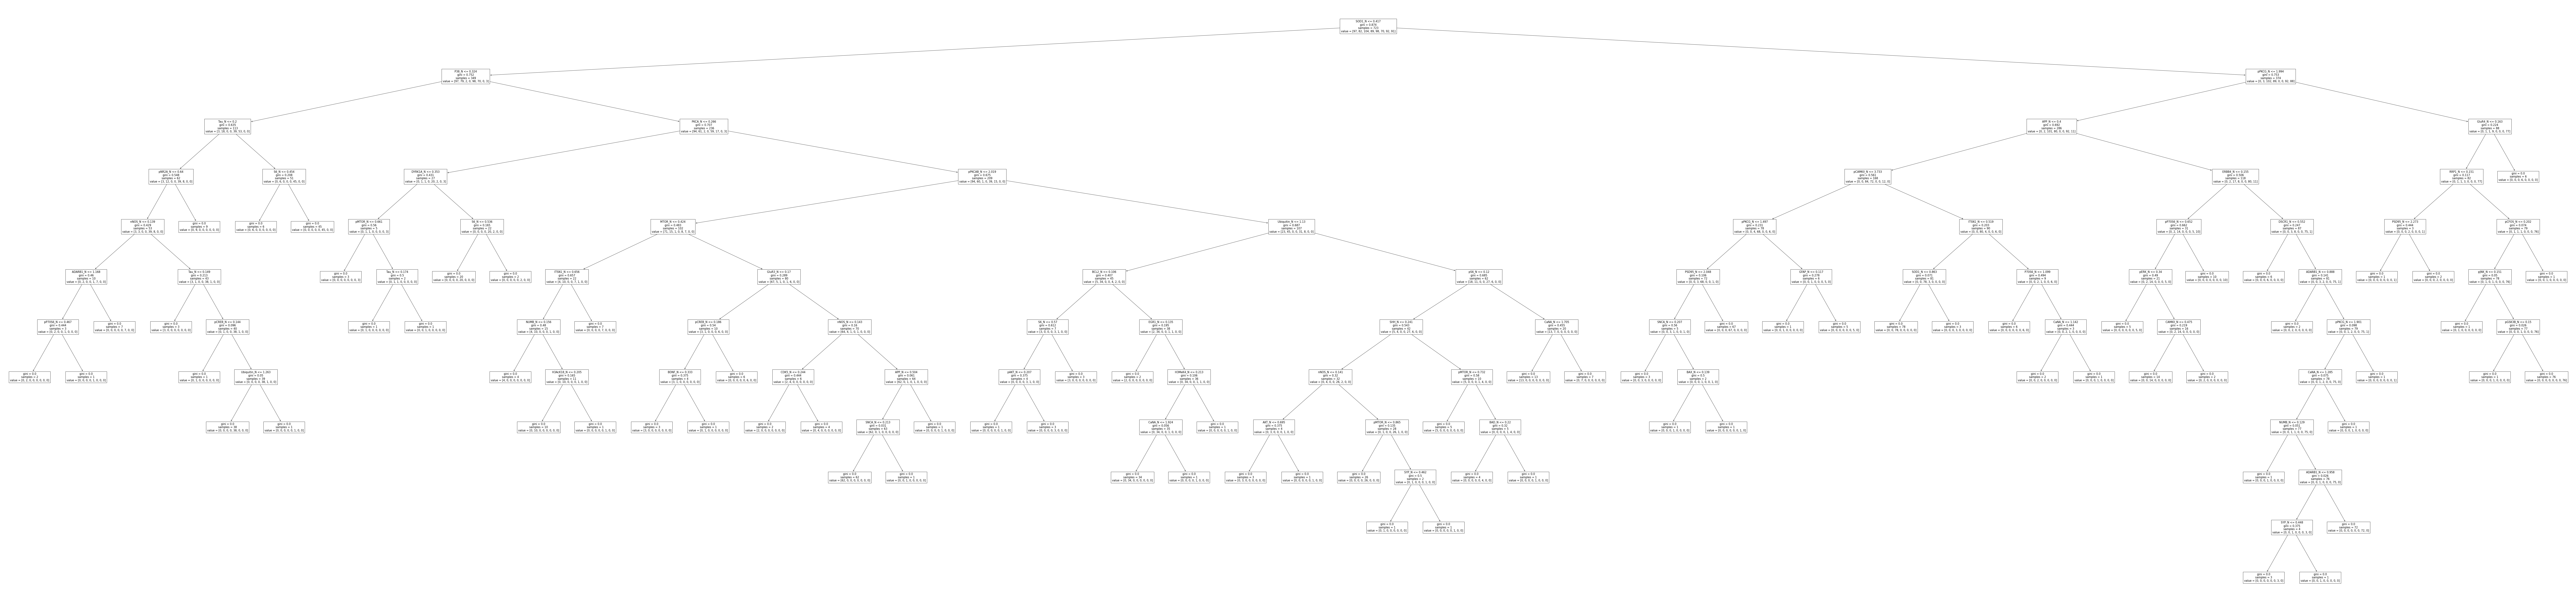

In [116]:
plt.figure(figsize=(250,60))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names=col_names) 

### **Penjelasan**


**Step by step untuk decision tree**
<br>
1. import library
2. sambungkan akun kaggle lebih mudah, tidak perlu unduh dataset
3. import data, tampilkan data
4. perhatikan datanya; tentang apa, tujuannya, target variabelnya
5. df2 = df supaya data df tetap original dan data untuk decision tree fokus pada df2. sekaligus tampilkan kolom yang tersedia
6. cek apa ada data kosong, kalau ada, hapus. di sini saya drop data tertentu karena kolom 'class' sudah memuat data tersebut.
7. pada bagian summary, kita bakal tahu info data pada tiap kolom misalkan tipe data float dan tidak null. lalu copy kolom yang tadi ditampilkan pada poin-4. itu untuk tau frekuensi tiap data dalam kolom.
8. X drop class karena class adalah variable target yang akan dibandingkan. jadi X (semua kolom) akan dibandingkan dengan Y (class)
9. X dibagi menjadi X_train dan X_test
10. Melihat dengan lebih rinci antara X_train dan X_test. data head menampilkan 5 data teratas X_train dan X_test (urutannya acak karena telah dipisah pada poin-9
11. Membuat decision tree dengan index gini

**Penjelasan mengenai gambar decision tree**

- Root = node teratas
- sub-tree = semua kecuali root
- parent[child 1, child 2] 
- gini index = kalkulasi menggunakan index gini antara data pada kolom tersebut dengan data pada kolom target variabel (ingat kembali bahwa target variablenya adalah class). gini terbesar menjadi root dari decision tree ini. gini itu sederhananya adalah seberapa besar kerandoman dalam data
- nilai dari kolom berupa col<=x, x adalah nilai threshold dari data pada kolom tersebut.
- sample = berapa banyak data yang ada di node tersebut
- value = terdapat 8 value yang mewakili 8 variabel 'class' 

**Membaca decision tree**
<br>
misalkan dapat dilihat pada leaf node (leaf node adalah node yang terakhir atau tidak ada anakan lagi) paling kanan.
- gini = 0 berarti data di dalam value sudah tidak random lagi.
- sample = 6, berarti data yang dimiliki hanya 6
- value = [0, 0, 0, 6, 0, 0, 0, 0]
  <br>
  maknanya: <br>
  class c-SC-m mempunyai 6 data Glur4_N>=0.163, pPkCG_N>=1.994, sOd1_N>=0.417

# Uji Coba 
jika variabel objeka adalah treatment.<br>
Tujuan: mencari tahu decision tree antara 77 level protein terhadap treatment yg diberikan. <br>
<br>
jadi pada leaf node atau node terakhir bisa ditarik kesimpulan bahwa jika protein A dari 77 protein menghasilkan saline maka row dengan 77 protein lainnya yang memiliki protein A pasti hasilnya adalah saline

## Pembuktian

### 1. import library

In [1]:
import pandas as pd
import matplotlib
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### 2. import data melalui akun kaggle

untuk data yang mempunyai penyimpanan data besar (berhubung data yang akan saya kelola berkisar 72 MB):

- ke akun kaggle
- ke profil dan ke bagian UPI
- kalau mau membuat token baru dengan cara klik create new UPI token dan otomatis terunduh file text yg isinya username dengan key-nya. lalu import os dan masukkan username dan key-nya

In [2]:
os.environ['KAGGLE_USERNAME'] = "ufairahbashir"
os.environ['KAGGLE_KEY'] = "4bb11797aa62c6027e309f1b5c852efd"

selanjutnya adalah copy link dataset yang akan diambil **tapi hanya sampai tepat setelah kata kaggle.com. atau bisa juga copy link akun/judul_data** karena beberapa dataset link nya berupa kaggle.com/dataset/akun/judul_data nah yg dicopy dari akun/judul_data nanti otomatis tersimpan di konten (konten adalah tempat file di bagian kiri) dalam bentuk arsip lalu nanti diekstra arsipnya. misalkan:

In [3]:
!kaggle datasets download -d ruslankl/mice-protein-expression

mice-protein-expression.zip: Skipping, found more recently modified local copy (use --force to force download)


nanti file yang telah terunduh dapat tampil pada bagian 'file' di sebelah kiri. lalu copy path-nya dan salin di sini untuk diesktrak

In [4]:
!unzip -q /content/mice-protein-expression.zip

replace Data_Cortex_Nuclear.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y


### 3. read data

In [5]:
df = pd.read_csv("/content/mice-protein-expression.zip")
print(df)

       MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0        309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1        309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2        309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3        309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4        309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   
...        ...       ...       ...       ...       ...       ...       ...   
1075  J3295_11  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736   
1076  J3295_12  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274   
1077  J3295_13  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665   
1078  J3295_14  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897   
1079  J3295_15  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001   

       pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H

intinya terdapat 1080 pengukuran pada setiap protein pada tikus

The data set consists of the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. There are 38 control mice and 34 trisomic mice (Down syndrome), for a total of 72 mice. In the experiments, 15 measurements were registered of each protein per sample/mouse. Therefore, for control mice, there are 38x15, or 570 measurements, and for trisomic mice, there are 34x15, or 510 measurements. The dataset contains a total of 1080 measurements per protein. Each measurement can be considered as an independent sample/mouse.

Expression levels of 77 proteins measured in the cerebral cortex of 8 classes of control and Down syndrome mice exposed to context fear conditioning, a task used to assess associative learning

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

Classes:

1. c-CS-s: control mice, stimulated to learn, injected with saline (9 mice)

2. c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice)

3. c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice)

4. c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice)

5. t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice)

6. t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice)

7. t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice)

8. t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice)

### 4. data.head

In [6]:
df.head()

MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine       C/S  c-CS-m  
1  0.135103  0.131119  1.743610   Control  Memantine       C/S  c-CS-m  
2  0.133362  0.127431  1.926427   Control  Memantine       C/S  c-CS-m  
3  0.147444  0.146901  1.700563   Control  Memantine       C/S  c-CS-m  
4  0.140314  0.148380  1.839730   Control  Memantine       C/S  c-CS-m  

[5 rows x 82 columns]

### 5. ubah df ke df3

In [7]:
df3 = df
df3.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [8]:
#drop col berikut karena bersifat objek
df3 = df.drop(['class','MouseID','Behavior', 'Genotype'],axis=1)

df3.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Treatment'],
      dtype='object')

### 6. Menghapus null data

In [9]:
df3.isnull().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Treatment      0
Length: 78, dtype: int64

In [10]:
# drop null data
df3 = df3.dropna()
print(df3)

      DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
75    0.649781  0.828696  0.405862  2.921435  5.167979  0.207174  0.176640   
76    0.616481  0.841974  0.388584  2.862575  5.194163  0.223433  0.167725   
77    0.637424  0.852882  0.400561  2.968155  5.350820  0.208790  0.173261   
78    0.576815  0.755390  0.348346  2.624901  4.727509  0.205892  0.161192   
79    0.542545  0.757917  0.350051  2.634509  4.735602  0.210526  0.165671   
...        ...       ...       ...       ...       ...       ...       ...   
1045  0.382149  0.595792  0.399101  2.527574  4.629493  0.317810  0.213235   
1046  0.387947  0.586510  0.431650  2.527041  4.781082  0.316903  0.222111   
1047  0.343695  0.562547  0.361243  2.412885  3.949361  0.330158  0.225620   
1048  0.346594  0.551467  0.390353  2.445052  4.236201  0.343610  0.229239   
1049  0.365907  0.552861  0.386275  2.473812  4.347236  0.353783  0.232784   

      pCAMKII_N   pCREB_N    pELK_N  ...     BAD_N    BCL2_N   

In [11]:
df3.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Treatment    0
Length: 78, dtype: int64

### 7. summary of dataset

In [128]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1080 entries, 0 to 1079
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DYRK1A_N         1080 non-null   float64
 1   ITSN1_N          1080 non-null   float64
 2   BDNF_N           1080 non-null   float64
 3   NR1_N            1080 non-null   float64
 4   NR2A_N           1080 non-null   float64
 5   pAKT_N           1080 non-null   float64
 6   pBRAF_N          1080 non-null   float64
 7   pCAMKII_N        1080 non-null   float64
 8   pCREB_N          1080 non-null   float64
 9   pELK_N           1080 non-null   float64
 10  pERK_N           1080 non-null   float64
 11  pJNK_N           1080 non-null   float64
 12  PKCA_N           1080 non-null   float64
 13  pMEK_N           1080 non-null   float64
 14  pNR1_N           1080 non-null   float64
 15  pNR2A_N          1080 non-null   float64
 16  pNR2B_N          1080 non-null   float64
 17  pPKCAB_N      

frekuensi di dataset

In [129]:
df3.columns

Index(['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Treatment'],
      dtype='object')

In [131]:
df3.shape

(1080, 78)

In [133]:
col_names = ['DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N', 'pBRAF_N',
       'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N', 'PKCA_N',
       'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N', 'pRSK_N', 'AKT_N',
       'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N', 'GSK3B_N', 'JNK_N',
       'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N', 'SOD1_N', 'MTOR_N',
       'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N', 'pNUMB_N',
       'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N', 'pGSK3B_N',
       'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N', 'RRP1_N',
       'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N', 'GluR3_N',
       'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N', 'SNCA_N',
       'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N', 'pS6_N',
       'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N', 'CaNA_N',
       'Treatment']
for col in col_names:
    
    print(df3[col].value_counts())   

0.425810    3
0.503644    1
0.308720    1
0.283721    1
0.272600    1
           ..
2.017504    1
2.017304    1
1.539048    1
1.717857    1
0.302626    1
Name: DYRK1A_N, Length: 1078, dtype: int64
0.617102    3
0.639280    2
0.747193    1
0.478992    1
0.628115    1
           ..
2.003237    1
2.072160    1
1.635397    1
1.699689    1
0.461059    1
Name: ITSN1_N, Length: 1077, dtype: int64
0.319088    3
0.430175    1
0.315608    1
0.283995    1
0.302443    1
           ..
0.382448    1
0.370335    1
0.354444    1
0.345963    1
0.256564    1
Name: BDNF_N, Length: 1078, dtype: int64
2.297269    3
2.816329    1
2.450613    1
2.321204    1
2.378360    1
           ..
2.713344    1
2.637552    1
2.462857    1
2.447981    1
2.092790    1
Name: NR1_N, Length: 1078, dtype: int64
3.843934    3
5.990152    1
4.406943    1
3.685089    1
3.683770    1
           ..
5.243736    1
5.015774    1
4.676667    1
4.342391    1
2.594348    1
Name: NR2A_N, Length: 1078, dtype: int64
0.233168    3
0.231177 

In [132]:
df3['Treatment'].value_counts()

Memantine    570
Saline       510
Name: Treatment, dtype: int64

### 8. Mendeklarasikan fitur vektor dan variabel target

In [135]:
X = df3.drop(['Treatment'], axis=1)

y = df3['Treatment']

### 9. Membagi data ke dalam 'training' dan 'test'

In [136]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

0,33 yang berarti 33% data akan berada di bagian pengujian dan sisanya akan berada di bagian train. Parameter random_state menandakan pemisahan acak data menjadi dua bagian.

In [137]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((723, 77), (357, 77))

setelah data dibagi yaitu 67% dari 1080 rows data untuk data train dan 33% dari 1080 rows data untuk dataset

### 10. Feature Engineering

Feature Engineering adalah proses mengubah data mentah menjadi fitur berguna yang membantu kita memahami model dengan lebih baik dan meningkatkan daya prediktifnya. Saya akan melakukan rekayasa fitur pada berbagai jenis variabel.
<br>
Pertama, akan dicek lagi tipe data tiap variabelnya

In [138]:
X_train.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
SYP_N        float64
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Length: 77, dtype: object

In [139]:
X_test.dtypes

DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
NR2A_N       float64
              ...   
SYP_N        float64
H3AcK18_N    float64
EGR1_N       float64
H3MeK4_N     float64
CaNA_N       float64
Length: 77, dtype: object

karena banyak kolom antara data train dan data test maka tidak perlu ditampilkan masing-masing kolom antara data train dan data test

In [140]:
X_train.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
504  0.246061  0.396566  0.269697  2.138182  2.826263  0.186869  0.155758   
996  0.372281  0.577851  0.343369  2.235676  3.409814  0.253448  0.179576   
597  0.511218  0.657280  0.322344  2.196658  3.155678  0.243590  0.194597   
118  0.351673  0.475610  0.295235  2.034033  2.969938  0.269427  0.192002   
928  0.423483  0.734913  0.285146  2.180356  3.261802  0.208888  0.166868   

     pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
504   2.612121  0.185657  1.953131  ...  0.248643  0.152236  0.149263   
996   5.382891  0.236870  1.372546  ...  0.212176  0.168150  0.127432   
597   2.021062  0.226648  1.367216  ...  0.254221  0.157914  0.170366   
118   1.756665  0.237663  1.191719  ...  0.279001  0.232431  0.134762   
928   1.855438  0.190731  1.321978  ...  0.196033  0.151607  0.119360   

        pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
504  0.123546  0.124968  0.385242   0.140476  0.197855  0.191135  0.931119  
996  0.124833  0.113728  0.543120   0.166732  0.157439  0.187761  1.324329  
597  0.107949  0.168848  0.441282   0.234870  0.183135  0.205440  1.652438  
118  0.109713  0.178729  0.505140   0.169609  0.183135  0.309838  1.405496  
928  0.102308  0.110196  0.478715   0.121332  0.150795  0.181649  1.783784  

[5 rows x 77 columns]

In [141]:
X_test.head()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
423   0.492403  0.658379  0.339319  2.446823  4.613029  0.273250  0.218692   
548   0.182518  0.298969  0.229708  1.725425  2.699869  0.174822  0.139538   
731   0.288450  0.515536  0.286301  2.043971  3.312488  0.218683  0.199140   
588   0.571500  0.747993  0.311465  2.450201  3.827270  0.200075  0.165454   
1051  0.287189  0.523557  0.319746  2.425490  3.589465  0.244044  0.189254   

      pCAMKII_N   pCREB_N    pELK_N  ...     SHH_N     BAD_N    BCL2_N  \
423    4.184162  0.261280  1.540285  ...  0.175465  0.157914  0.134762   
548    2.747931  0.187309  0.784086  ...  0.226909  0.159926  0.145324   
731    2.929255  0.226304  1.252687  ...  0.223496  0.193266  0.134762   
588    2.424611  0.192925  1.415956  ...  0.213804  0.157914  0.109267   
1051   3.807835  0.250662  1.075172  ...  0.215971  0.130058  0.134762   

         pS6_N   pCFOS_N     SYP_N  H3AcK18_N    EGR1_N  H3MeK4_N    CaNA_N  
423   0.108074  0.111444  0.295769   0.169609  0.183135  0.205440  1.452390  
548   0.127593  0.130490  0.399351   0.169609  0.220072  0.338278  1.090741  
731   0.121347  0.153438  0.506160   0.169609  0.286819  0.205440  1.152579  
588   0.111439  0.104537  0.384723   0.149360  0.183135  0.205440  1.720202  
1051  0.113900  0.131053  0.305273   0.287167  0.127822  0.220443  1.372286  

[5 rows x 77 columns]

In [142]:
X_train.shape

(723, 77)

In [143]:
X_test.shape

(357, 77)

### 11. Decision Tree Classifier dengan criterion gini index

In [144]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [145]:
# inisiasi DecisionTreeClassifier model dengan criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=15, random_state=0)


# fit the model
dftree = clf_gini.fit(X_train, y_train)

Memprediksikan test set result dengan kriteria index gini

In [146]:
y_pred_gini = clf_gini.predict(X_test)

mengecek akurasi skor dengan kriteria index gini

In [147]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8655



Di sini, y_test adalah label kelas sebenarnya dan y_pred_gini adalah label kelas yang diprediksi dalam set pengujian.

**Membandingkan train-set dan test-set accuracy**
<br>
Sekarang, saya akan membandingkan akurasi train-set dan test-set untuk memeriksa overfitting.

In [148]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['Saline', 'Saline', 'Memantine', 'Memantine', 'Saline',
       'Memantine', 'Memantine', 'Memantine', 'Saline', 'Memantine',
       'Saline', 'Memantine', 'Memantine', 'Saline', 'Memantine',
       'Memantine', 'Saline', 'Memantine', 'Memantine', 'Saline',
       'Memantine', 'Memantine', 'Saline', 'Saline', 'Memantine',
       'Saline', 'Memantine', 'Saline', 'Saline', 'Memantine', 'Saline',
       'Saline', 'Saline', 'Saline', 'Saline', 'Saline', 'Saline',
       'Memantine', 'Saline', 'Memantine', 'Saline', 'Memantine',
       'Memantine', 'Saline', 'Memantine', 'Saline', 'Saline', 'Saline',
       'Memantine', 'Saline', 'Memantine', 'Memantine', 'Saline',
       'Memantine', 'Saline', 'Saline', 'Saline', 'Memantine',
       'Memantine', 'Memantine', 'Memantine', 'Memantine', 'Memantine',
       'Memantine', 'Memantine', 'Saline', 'Memantine', 'Memantine',
       'Saline', 'Saline', 'Saline', 'Memantine', 'Saline', 'Memantine',
       'Saline', 'Memantine', 'Memantine', 'Sali

In [149]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


Mengecek overfitting and underfitting

In [150]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.8655


Di sini, skor akurasi training-set dan test-set sama sehingga tidak ada tanda-tanda overfitting.

**Memvisualisasikan decision-trees**

[Text(0.6941207627118644, 0.9583333333333334, 'node #0\npPKCG_N <= 2.056\ngini = 0.497\nsamples = 723\nvalue = [391, 332]'),
 Text(0.46875, 0.875, 'node #1\nUbiquitin_N <= 1.347\ngini = 0.451\nsamples = 519\nvalue = [341, 178]'),
 Text(0.1917372881355932, 0.7916666666666666, 'node #2\nELK_N <= 0.908\ngini = 0.497\nsamples = 352\nvalue = [189, 163]'),
 Text(0.03389830508474576, 0.7083333333333334, 'node #3\npBRAF_N <= 0.128\ngini = 0.283\nsamples = 82\nvalue = [68, 14]'),
 Text(0.01694915254237288, 0.625, 'node #4\ngini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.05084745762711865, 0.625, 'node #5\nS6_N <= 0.507\ngini = 0.188\nsamples = 76\nvalue = [68, 8]'),
 Text(0.03389830508474576, 0.5416666666666666, 'node #6\nTIAM1_N <= 0.265\ngini = 0.081\nsamples = 71\nvalue = [68, 3]'),
 Text(0.01694915254237288, 0.4583333333333333, 'node #7\ngini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.05084745762711865, 0.4583333333333333, 'node #8\npMEK_N <= 0.174\ngini = 0.056\nsamples = 70\nvalue =

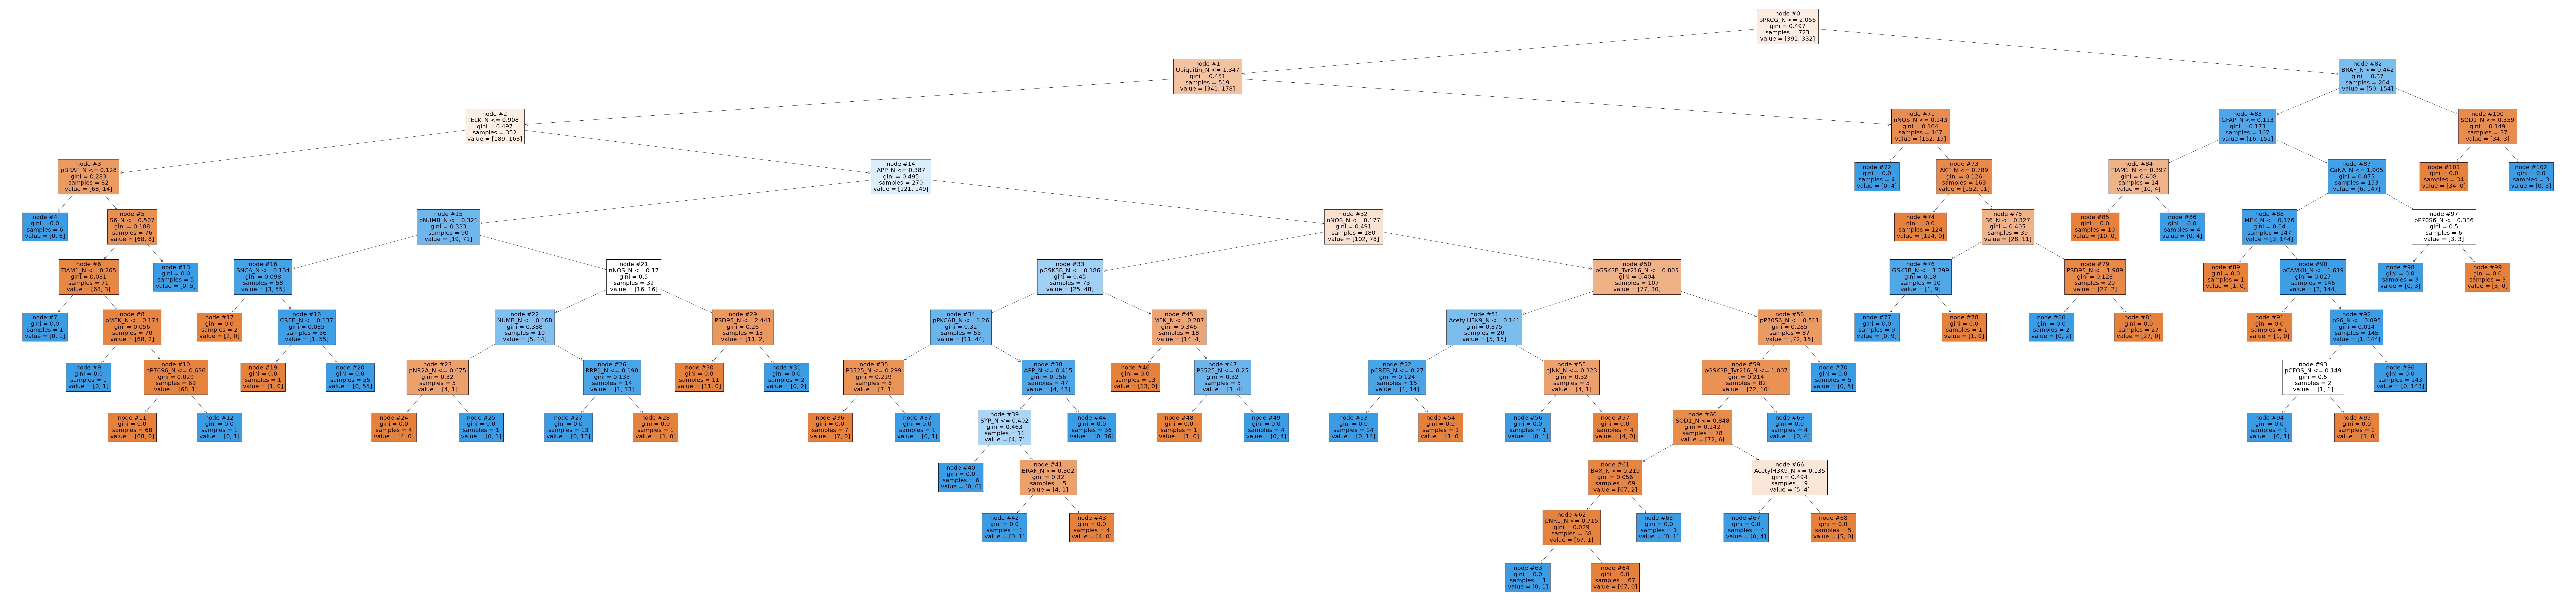

In [155]:
plt.figure(figsize=(250,60))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train), feature_names=col_names, node_ids=True, filled=True) 

Dapat diketahui dari salah satu Node yaitu pNR1_N<=0,715 mempunyai 1 saline sehingga bagaimanapun acaknya value dari kolum satu row jika terdapat value<=0,715 pada kolum pNR1_N di antara row 1-1080 percobaan maka row tersebut pasti treatment nya adalah saline

begitu pula dengan pP70S6_N<=0,636 mempunyai 68 saline. maka terdapat 68 row dengan sembarang value kolum lainnya dapat mempunyai treatmen saline jika terdapat kolom pP70S6_N dengan value<=0,636 